# Etots Data Mining

## Import Libraries

In [23]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import OneHotEncoder
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample


## Import data

In [2]:
data = pd.read_csv("etots_training.csv")

In [3]:
cat = ['Self',
      'Gift', 
      'J_9711', ]

cont = ['S_99HOL',
        'M_VAL99H',
        'S_00OFF',
        'S_IDX',
        'N_S_INDX',
        'TENURE']

'''      'J_9712',
      'J_9801',
      'J_9802' ,
      'J_9803' ,
      'J_9804' ,
      'J_9805' ,
      'J_9806' ,
      'J_9807' ,
      'J_9808',
      'J_9809' ,
      'J_9810' ,
      'J_9811' ,
      'J_9812' ,
      'J_9901',
      'J_9902' ,
      'J_9903' ,
      'J_9904' ,
      'J_9905' ,
      'J_9906' ,
      'J_9907' ,
      'J_9908'''

"      'J_9712',\n      'J_9801',\n      'J_9802' ,\n      'J_9803' ,\n      'J_9804' ,\n      'J_9805' ,\n      'J_9806' ,\n      'J_9807' ,\n      'J_9808',\n      'J_9809' ,\n      'J_9810' ,\n      'J_9811' ,\n      'J_9812' ,\n      'J_9901',\n      'J_9902' ,\n      'J_9903' ,\n      'J_9904' ,\n      'J_9905' ,\n      'J_9906' ,\n      'J_9907' ,\n      'J_9908"

In [4]:
# separate majority and minority classes
majority = data[data.HOL_REP == 0]
minority = data[data.HOL_REP == 1]

# upsample minority class
minority_upsampled = resample(minority, replace = True , n_samples = 20000, random_state = 123)

# combine upsampled data set with majority class
data = pd.concat([majority, minority_upsampled], ignore_index=True)

In [5]:
data = data.reindex(np.random.permutation(data.index))

## Preprocess

In [6]:
def preprocess_features(data, cont_features, cat_features):
    import pandas as pd
    """Prepares input features from concrete slump test data set.

      Args:
        concrete_dataframe: A Pandas DataFrame expected to contain data
      from the concrete slump test dataset.
      Returns:
        A DataFrame that contains the features to be used for the model. 
      """
    # scale training continuous data
    scaler = StandardScaler().fit(data[cont_features].values)

    scaledf = scaler.transform(data[cont_features].values)

    cont_data = pd.DataFrame(scaledf, index=data[cont_features].index, columns=data[cont_features].columns)

    #processed_features = cont_features.copy()
    
    # scale categorical data
    cat_data = pd.get_dummies(data[cat_features])
        
    processed_features = pd.concat([cont_data, cat_data], axis=1)
    
    #selected_features.copy()
  
    return processed_features

def preprocess_targets(data):
   
    output_targets = data.iloc[:,0]
    return output_targets

## Split train/validation

In [7]:
# Choose the first 20,000 examples for training.
training_examples = preprocess_features(data.head(20000), cont, cat)
training_targets = preprocess_targets(data.head(20000))

validation_examples = preprocess_features(data.tail(20000), cont, cat)
validation_targets = preprocess_targets(data.tail(20000))

In [8]:
validation_targets.value_counts()

0    10009
1     9991
Name: HOL_REP, dtype: int64

In [9]:
# fit model no training data
model = XGBClassifier()
model.fit(training_examples, training_targets)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [10]:
# make predictions for test data
y_pred = model.predict(validation_examples)

predictions = [round(value) for value in y_pred]

In [11]:
accuracy = accuracy_score(validation_targets, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.19%


## Down sample to improve accuracy

In [12]:
training_targets.value_counts()

1    10009
0     9991
Name: HOL_REP, dtype: int64

# Deep Learning model

In [15]:
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [16]:
# Choose the first 20,000 examples for training.
training_examples = preprocess_features(data.head(20000), cont, cat)
training_targets = preprocess_targets(data.head(20000))

validation_examples = preprocess_features(data.tail(20000), cont, cat)
validation_targets = preprocess_targets(data.tail(20000))


## Build Model

In [34]:
baseline_model = keras.Sequential([
    keras.layers.Dense(25, activation=tf.nn.relu,input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(25, activation=tf.nn.relu,),keras.layers.Dense(1)

  ])

baseline_model.compile(optimizer= 'Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 25)                250       
_________________________________________________________________
dense_7 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 26        
Total params: 926
Trainable params: 926
Non-trainable params: 0
_________________________________________________________________


## Fit model

In [35]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 15
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[PrintDot()])


...............

In [36]:
print(min(b_history.history['accuracy']))

0.4983


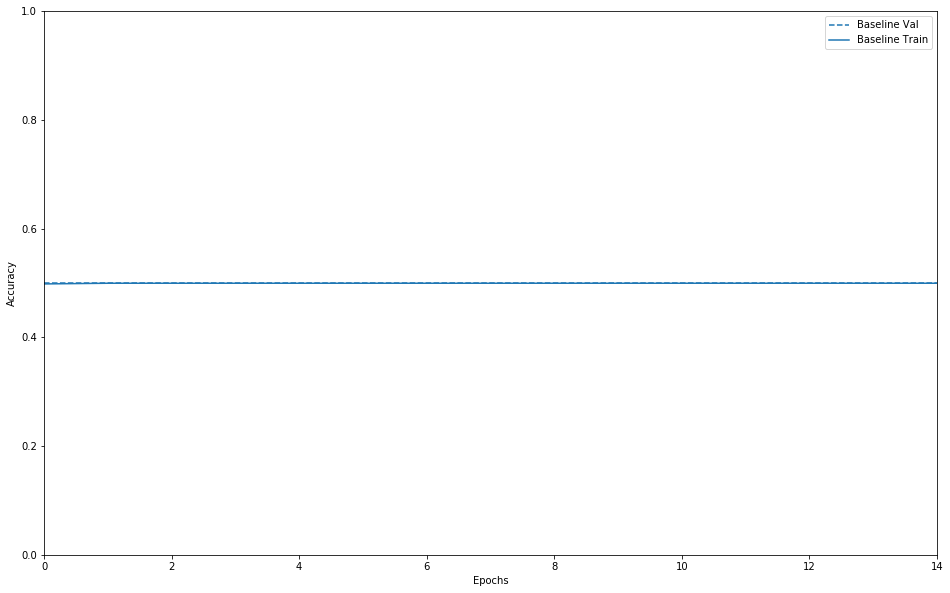

In [38]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    plt.ylim([0,1])

plot_history([('baseline', b_history)])

### Appendix

In [ ]:
def prepare_inputs(X_train, X_test):
    
    categorical = ['Epigastric pain ',
       "Fever",
       'Nausea/Vomting', 
       'Headache ', 
       'Diarrhea ', 
       'Jaundice ',]
        
    ohe = OneHotEncoder()
    ohe.fit(X_train[categorical])
    X_train_enc = ohe.transform(X_train[categorical])
    X_test_enc = ohe.transform(X_test[categorical])
    
    return X_train_enc, X_test_enc

In [69]:
def preprocess_features(data):
    """Prepares input features from concrete slump test data set.

      Args:
        concrete_dataframe: A Pandas DataFrame expected to contain data
      from the concrete slump test dataset.
      Returns:
        A DataFrame that contains the features to be used for the model. 
      """
    
    selected_features = data[['S_99HOL',
                         'M_VAL99H',
                         'S_00OFF',
                         'S_IDX',
                         'N_S_INDX',
                         'TENURE']]
   
    processed_features = selected_features.copy()
  
    return processed_features

def preprocess_targets(data):
   
    output_targets = data.iloc[:,0]
    return output_targets